In [26]:
import torch
from torch.optim.lr_scheduler import _LRScheduler
import matplotlib.pyplot as plt

class PolynomialLRDecay(_LRScheduler):
    """Polynomial learning rate decay until step reach to max_decay_step
    
    Args:
        optimizer (Optimizer): Wrapped optimizer.
        max_decay_steps: after this step, we stop decreasing learning rate
        end_learning_rate: scheduler stoping learning rate decay, value of learning rate must be this value
        power: The power of the polynomial.
    """
    def __init__(self, optimizer, max_decay_steps, end_learning_rate=0.0001, power=1.0):
        if max_decay_steps <= 1.:
            raise ValueError('max_decay_steps should be greater than 1.')
        self.max_decay_steps = max_decay_steps
        self.end_learning_rate = end_learning_rate
        self.power = power
        self.last_step = 0
        super().__init__(optimizer)

    def get_lr(self):
        if self.last_step > self.max_decay_steps:
            return [self.end_learning_rate for _ in self.base_lrs]

        return [(base_lr - self.end_learning_rate) * ((1 - self.last_step / self.max_decay_steps)**(self.power)) +
                self.end_learning_rate for base_lr in self.base_lrs]

    def step(self, step=None):
        if step is None:
            step = self.last_step + 1
        self.last_step = step if step != 0 else 1
        if self.last_step <= self.max_decay_steps:
            decay_lrs = [(base_lr - self.end_learning_rate) *
                         ((1 - self.last_step / self.max_decay_steps)**(self.power)) + self.end_learning_rate
                         for base_lr in self.base_lrs]
            for param_group, lr in zip(self.optimizer.param_groups, decay_lrs):
                param_group['lr'] = lr


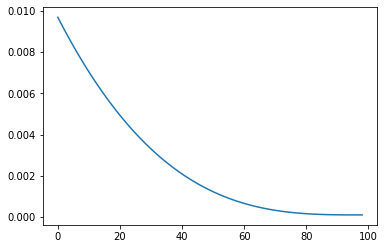

In [28]:
v = torch.zeros(10)
optim = torch.optim.SGD([v], lr=0.01)
scheduler = PolynomialLRDecay(optim, max_decay_steps=99, end_learning_rate=0.0001, power=3)
out = []
for epoch in range(1, 100):
    scheduler.step(epoch)
    out = out + [optim.param_groups[0]['lr']]
plt.plot(out)
plt.show()
#     print(epoch, optim.param_groups[0]['lr'])